## Usecase 5 - Synaptic Reports

In this tutorial we will learn how to use bluepy to plot synaptic conductances from a simulation report.

As usual, we start by importing some basic packages and creating the bluepy simulation object. Again we will use a quite old simulation hence the possible warnings from the BlueConfig parser. Again you can ignore the warnings.

In [1]:
import matplotlib.pyplot as plt

from bluepy import Simulation
path = "/gpfs/bbp.cscs.ch/project/proj1/simulations/ReNCCv2/k_ca_scan_dense/K5p0/Ca1p25_synreport/BlueConfig"

# disable warning for bluepy-configfile because it noises output and functional tests fail because of it
import logging
import bluepy_configfile
logger = logging.getLogger(bluepy_configfile.__name__)
logger.setLevel(logging.ERROR)

sim = Simulation(path)

To list the reports obtained for this simulation:

In [2]:
[report.name for report in sim.config.typed_sections('Report')]

['soma', 'gsyn']

Here we focus on `gsyn` report, containing conductance recordings from a subset of synapses in the simulation. Let's start by getting the corresponding report object:

In [3]:
rep = sim.report('gsyn')

To list the recorded GIDs:

In [4]:
print(rep.gids)

[75936]


The report contains only one cell. We can now get conductance vs time for any synapse available in the report using the `get()`, `get_gid()`, `get_synapses()` methods. Given the huge number of synapses on each cells, we can limit ourselves to just three of them that were activated during the simulation.

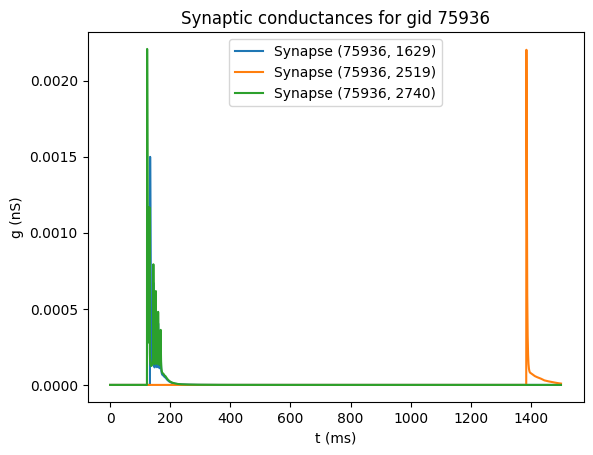

In [5]:
gid = rep.gids[0]
data = rep.get_gid(gid)

synapse_count = 0
for synapse_id in data:
    synapse_data = data[synapse_id]
    if synapse_data.any():  # Synapse was activated
        plt.plot(synapse_data, label='Synapse %s' % str(synapse_id))
        synapse_count+= 1
        if synapse_count > 2:
            break
            
plt.legend(loc=0)
plt.xlabel('t (ms)')
plt.ylabel('g (nS)')
plt.title('Synaptic conductances for gid %d'% gid);

In [6]:
plt.close('all')